# Summary
I ran a pearson correlation to examine the relationship between gray matter volume and a measure of fluid intelligence, the Penn Progressive Matrices. Results were significant, r = 0.32, p < 0.001. Effect size interpretations vary, but based on the convention of small (0.1), medium (0.3), and large (0.5), a correlation of 0.32 would be considered medium.

$r^2$ was found to be 0.10, meaning that 10% of the variability in the task could be explained by gray matter volume, and vice-versa.

To test the effect of gender as a potential moderator, I ran the correlation between gray matter volume and the fluid intelligence measure for males and females separately. 

Results of the moderator analysis showed that while the directionality of correlation for both males and females were significant and positive, males had a greater correlation coefficient than females (r = 41 vs. r = .20), suggesting that brain size is more associated with fluid intelligence for males compared to females.

# Data Explanation
The Human Connectome Project's *behavioral* dataset includes demographic information, performance on various tasks, and measures of brain structure/function for 1206 adults (ages 22+). The neuroimaging dataset includes four imaging modalities: structural images (T1w and T2w), resting-state fMRI (rfMRI), task-fMRI (tfMRI), and high angular resolution diffusion imaging (dMRI). These files can be quite large (tens of GB).

The data is open-access. The reference manual can be found [here](https://www.humanconnectome.org/storage/app/media/documentation/s1200/HCP_S1200_Release_Reference_Manual.pdf) and the data can be found [here](http://db.humanconnectome.org/) if you're interested. You will need to register an account to access the data, but that process should be straightforward.

# Replication Notes
I downloaded the data on my google drive [here](https://drive.google.com/file/d/1-F5s908KDLcbfDlN1BYOBWKhe1E4tqWC/view?usp=sharing ), so to replicate the results of this notebook, you can simply follow that link and download the `HCP-behavioral.csv` file to your own Google Drive. 

Just make sure that when you're reading the file `data = pd.read_csv('/content/gdrive/MyDrive/Data/HCP-behavioral.csv')`, the path is correct. As you can see, I put my file in a folder called `Data`, but you can put yours wherever, as long as the path argument for the `read_csv()` function is specific to the location of your version of `HCP-behavioral.csv`.

# Imports, Mounts, and Reading Data

In [1]:
import google.colab.drive as drive
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/Data/HCP-behavioral.csv')

# Data Subsetting and Cleaning

In [4]:
data.Age.value_counts()

26-30    527
31-35    418
22-25    247
36+       14
Name: Age, dtype: int64

HCP dataset has four age groups. I will go with 26-30. It is the highest, and at that age there should be less variability (finished developing but hasn't started age-related atrophy).

In [5]:
data_high20s = data[data['Age']=='26-30']
data_high20s_subset = data_high20s[['FS_Total_GM_Vol','PMAT24_A_CR', 'Gender']]
data_high20s_subset.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Correlation Analysis and Results

In [6]:
# Running the correlation
X = data_high20s_subset['FS_Total_GM_Vol'] 
Y = data_high20s_subset['PMAT24_A_CR']
corr = stats.pearsonr(X, Y)

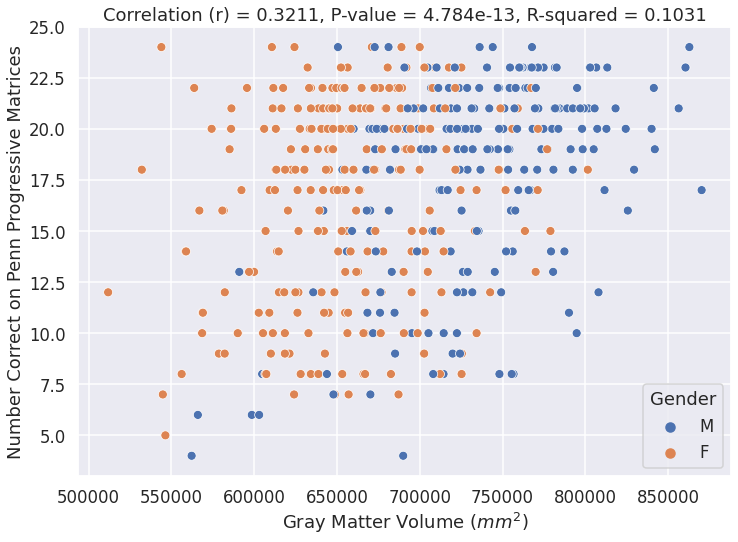

In [7]:
# Visualizing the results
sns.set_theme(context='talk', rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=X, y=Y, hue=data_high20s_subset['Gender'])
plt.xlabel('Gray Matter Volume ($mm^2$)', fontsize=18)
plt.ylabel('Number Correct on Penn Progressive Matrices', fontsize=18)
plt.title(f'Correlation (r) = {corr[0]:.4g}, P-value = {corr[1]:.4g}, R-squared = {corr[0]**2:.4g}')
plt.show()

# Moderator Analysis
Run the brain size and fluid intelligence correlation for male and female separately.

In [8]:
data.Gender.value_counts()

F    656
M    550
Name: Gender, dtype: int64

In [9]:
data_high20s_male = data[(data['Age']=='26-30') & (data['Gender']=='M')]
data_high20s_female = data[(data['Age']=='26-30') & (data['Gender']=='F')]

data_high20s_male_subset = data_high20s_male[['FS_Total_GM_Vol','PMAT24_A_CR']]
data_high20s_male_subset.dropna(inplace=True)

data_high20s_female_subset = data_high20s_female[['FS_Total_GM_Vol','PMAT24_A_CR']]
data_high20s_female_subset.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Correlation for Males

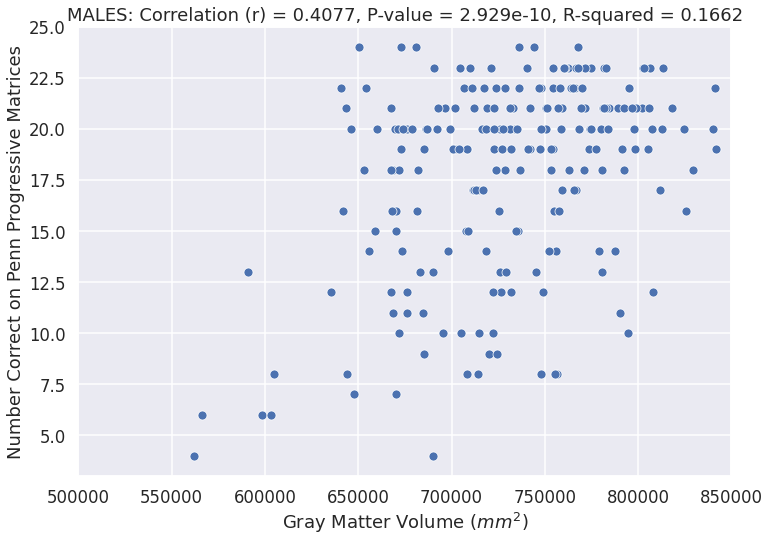

In [10]:
# Running the correlation
X_male = data_high20s_male_subset['FS_Total_GM_Vol'] 
Y_male = data_high20s_male_subset['PMAT24_A_CR']
corr = stats.pearsonr(X_male, Y_male)
# Visualizing the results
sns.set_theme(context='talk', rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=X_male, y=Y_male)
plt.xlim((500000,850000))
plt.xlabel('Gray Matter Volume ($mm^2$)', fontsize=18)
plt.ylabel('Number Correct on Penn Progressive Matrices', fontsize=18)
plt.title(f'MALES: Correlation (r) = {corr[0]:.4g}, P-value = {corr[1]:.4g}, R-squared = {corr[0]**2:.4g}')
plt.show()

## Correlation for Females

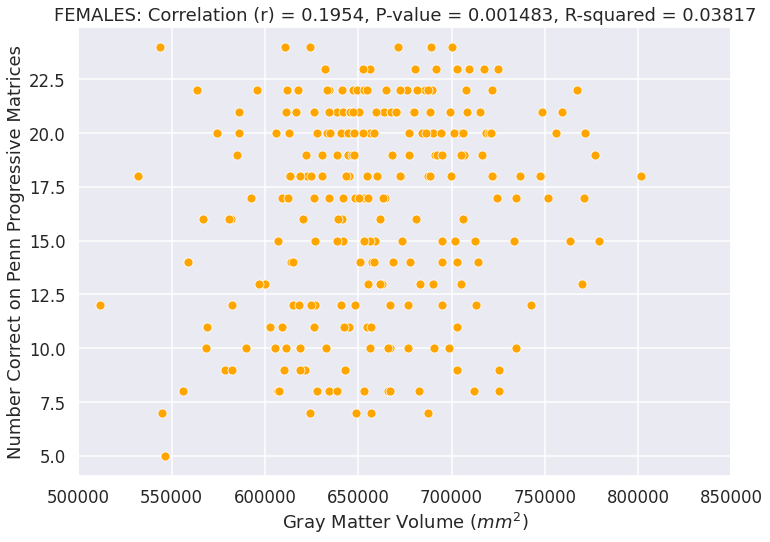

In [11]:
# Running the correlation
X_female = data_high20s_female_subset['FS_Total_GM_Vol'] 
Y_female = data_high20s_female_subset['PMAT24_A_CR']
corr = stats.pearsonr(X_female, Y_female)
# Visualizing the results
sns.set_theme(context='talk', rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=X_female, y=Y_female, color='orange')
plt.xlim((500000,850000))
plt.xlabel('Gray Matter Volume ($mm^2$)', fontsize=18)
plt.ylabel('Number Correct on Penn Progressive Matrices', fontsize=18)
plt.title(f'FEMALES: Correlation (r) = {corr[0]:.4g}, P-value = {corr[1]:.4g}, R-squared = {corr[0]**2:.4g}')
plt.show()

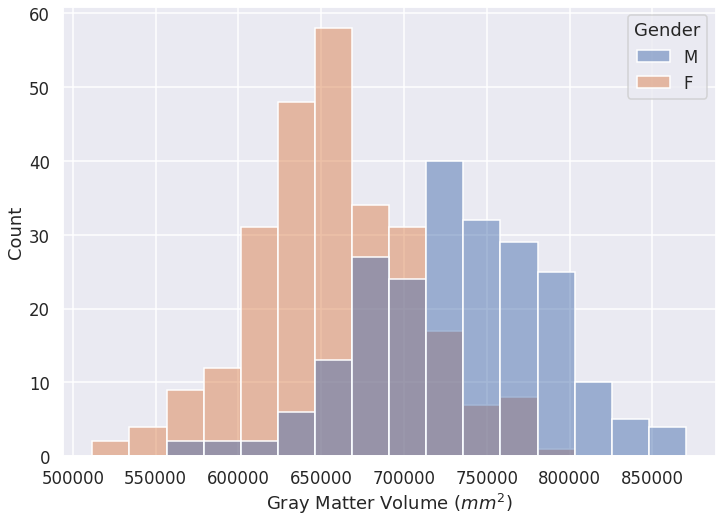

In [12]:
sns.histplot(x=data_high20s_subset['FS_Total_GM_Vol'], hue=data_high20s_subset['Gender'])
plt.xlabel('Gray Matter Volume ($mm^2$)', fontsize=18)
plt.show()

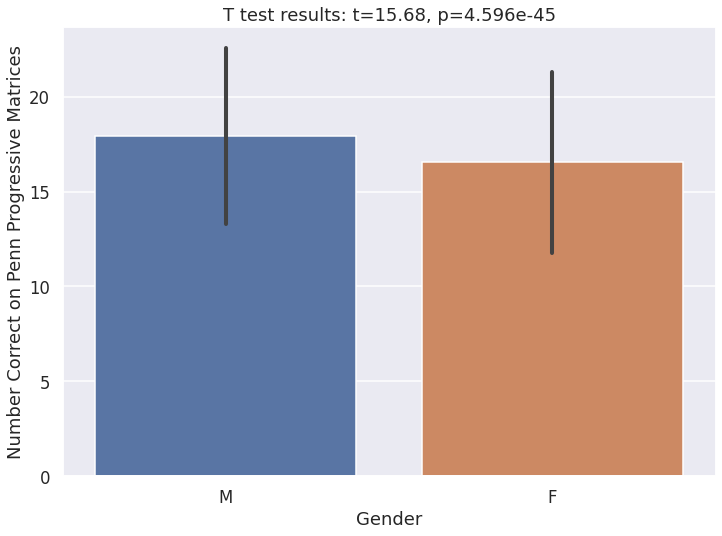

In [15]:
ttest_g = stats.ttest_ind(X_male, X_female)
sns.barplot(data=data_high20s_subset, x='Gender', y='PMAT24_A_CR', ci='sd')
plt.title(f'T test results: t={ttest_g[0]:.4g}, p={ttest_g[1]:.4g}')
plt.ylabel('Number Correct on Penn Progressive Matrices')
plt.show()

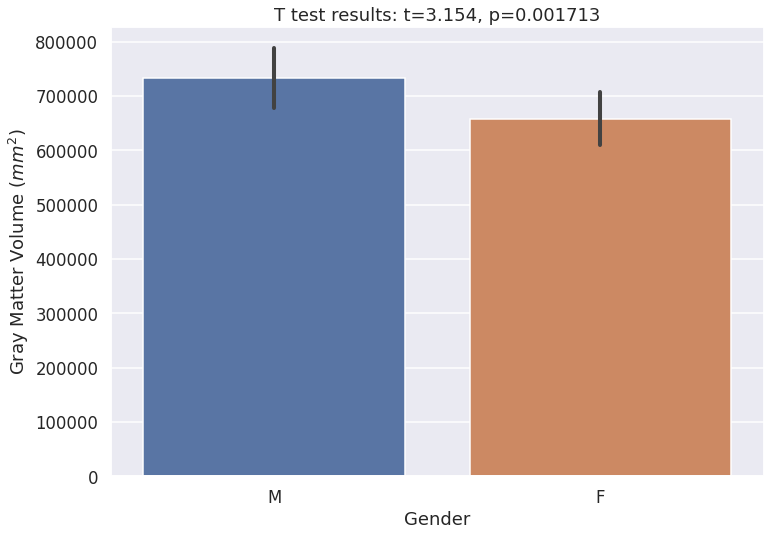

In [16]:
ttest_vol = stats.ttest_ind(Y_male, Y_female)
sns.barplot(data=data_high20s_subset, x='Gender', y='FS_Total_GM_Vol', ci='sd')
plt.title(f'T test results: t={ttest_vol[0]:.4g}, p={ttest_vol[1]:.4g}')
plt.ylabel('Gray Matter Volume ($mm^2$)')
plt.show()